### BUSINESS CASE: Using the FIFA20 dataset we need to cluster the players by their skills into certain group

### IMPORTING BASIC LIBRARIES

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### IMPORT  DATA

In [2]:
data = pd.read_csv('players_20.csv')
data

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


### DOMAIN ANALYSIS

In [3]:
columns = list(data.columns)
print(columns)

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_

#### SOFIFA-ID:
Id of fifa20 player
#### PLAYER URL:
It is a unique identifier used to locate a resource on the Internet. It is also referred to as a web address.
#### SHORT NAME:
Short or nick name of the player
#### LONG NAME:
Full name of the player
#### AGE:
Age in years
#### DOB:
Date of birth of the player
#### HEIGHT CM:
Player height in centimeter
#### WEIGHT KG:
Player body weight
#### NATIONALITY:
Nationality is the legal status, which represents the country from which the player belongs. 
#### CLUB:
A group of people formed for the purpose of playing sports.
#### OVERALL:
The OVR (Overall) is made up of all the player's ingame stats.
#### POTENTIAL:
The potential rating, is the rating they will achieve for sure during the FIFA 20 career mode.
#### VALUE EUR:
The value of palyer in euro.
#### WAGE EUR:
A living wage is the amount of income needed to provide an player with a basic but socially acceptable standard of living.
#### PLAYER POSITIONS:
Positions indicate approximately where each player should be lined up prior to the start of a play.
#### PREFERRED FOOT:
It refers to the foot which a player uses to kick with the greatest force and skill.
#### INTERNATIONAL REPUTATION:
International reputation is rated with 1-5 stars.
#### WEAK FOOT:
A player's foot (left or right) that is weaker than their preferred foot. A player's attribute rated between 1 to 5 which specifies the shot power and ball control for the other foot of that player than his preferred foot's.
#### SKILL MOVES:
skill moves, it is assigned a number between 1 (least complex) and 5 (most complex). Players with higher skills are able to perform more complex moves.
#### WORK RATE:
work rates are how hard the player works on each end of the field.
#### BODY-TYPE:
A custom body type and character of football player.
#### REAL FACE:
Face scan of real football palyer if it 'yes' then the character is look super realistic.
#### RELEASE CLAUSE EUR:
A release clause is the minimum amount of money you're willing to accept for that player.
#### PLAYER TAGS:
The tages of player is identified the palyer skills,like [Dribbler, Distance shooter, Crosser, Speedster]
#### TEAM POSITION:
The player’s positioning on the field
#### TEAM JERSEY NUMBER:
The number on the back of a football player's jersey.
#### LONED FROM:
It's a temporary restriction placed on player due to their club being short of players.
#### JOINED:
Joining date of club
#### CONTRACT VALID UNTIL:
The end year of contract of players.
#### NATION POSITION:
Nation position is similar to the team position of players.
#### NATION JERSEY NUMBER:
Jersey number of player.
#### PACE:
Fastest pace of player,striker or winger
#### SHOOTING:
shooting is hitting the ball in an attempt to score a goal. It is usually done using the feet or head.
#### PASSING:
The purpose of passing is to keep possession of the ball by maneuvering it on the ground between different players with the objective of advancing it up the playing field.
#### DRIBBLING:
Dribbling is maneuvering a ball by one player while moving in a given direction, avoiding problems attempts to intercept the ball.
#### DEFENDING:
Defending is most relate to the defender to stop the attack
#### PHYSIC:
physic in player means intensity and their effort.
#### GK DIVING:
Goal keeper diving to save a shot.
#### GK HANDLING:
As a goalkeeper, you are allowed to handle the ball with your hands within your penalty area.
#### GK KICKING:
The goalkeeper is the player who usually kicks the ball to resume play, and they either kick it short to a teammate or it is kicked extremely hard to travel a long distance.
#### GK REFLEX:
Ability to react quickly.
#### GK SPEED:
Speed of goal keeper.
#### GK POSITIONING:
Position of goal keeper is around only goal posts.
#### PLAYER TRAITS:
A player’s traits are actions that he will be more likely to perform in matches.
#### ATTACKING CROSSING:
The aim of a cross is to create the easiest possible scenario for the attacking player to score a goal.
#### ATTACKING FINISHING:
Create a attack on field to score a goal
#### ATTACKING HEADING ACCURACY:
One of the fundamental principles of the attacking header is to head the ball downwards.
#### ATTACKING SHORT PASSING:
Short passes of ball to score a goal
#### ATTACKING VOLLEYS:
A volley is an air-borne strike in association football, where a player's foot meets and directs the ball in an angled direction before it has time to reach the ground.
#### SKILL DRIBBLING:
The score of dribbling skill with football
#### SKILL CURVE:
The curve of football at the time of goal
#### SKILL FK ACCURACY:
It stands for field goal. It is when a player kicks a ball through the uprights from a set distance.
#### SKILL LONG PASSING:
The long passing skill score of the player
#### SKILL BALL CONTROL:
The ball control of the player at playing time
#### MOVEMENT ACCERLATION:
How quickly player can increase your velocity towards maximum speed.
#### MOVEMENT SPRINT SPPED:
Sprinting speed score of the player.
#### MOVEMENT AGILITY:
Agility is the ability to move quickly and easily, including moving in different directions without losing balance
#### MOVEMENT REACTION:
The score of the quick reation of player.
#### MOVEMENT BALANCE:
Balance is the ability to control your body in its own space.
#### SHOT POWER:
power generate to score a goal.
#### POWER JUMPING:
The jumping ability of the player on field.
#### POWER STAMINA:
Stamina of player on filed.
#### POWER STRENGTH:
Strength of player on field.
#### POWER LONG SHOT:
Total number of power long shot of football.
#### MENTALITY AGGRESSION:
Aggression is a characteristic that can have many negative as well as positive effects on performance of player.
#### MENTALITY INTERCEPTION:
Interception is thrown the possession of the ball is given to the other team.
#### MENTALITY POSITIONING:
The mentality positioning of player determines how defensive or attacking your players set out to play.
#### MENTALITY VISION:
The vision/mindset of player on filed.
#### MENTALITIES PENALTIES:
when a player commits an infraction against the rules of the game a foul will be called and a penalty will be assessed.
#### MENTALITY COMPOSURE:
composure stand for: Recognize–Regroup–Refocus. The first step is to Recognize that you are dwelling on the mistake, which limits your ability focus on the next play.
#### DEFENDING MAKING:
when your team is defending, you want to make the field small and the options of the other team limited.
#### DEFENDING STANDING TACKLE:
Defending standing Tackle of the player to get a ball on filed.
#### DEFENDING SLIDING TACKLE:
Defending sliding tackle of player to get a ball.
#### GOALKEEPING DIVING:
Goal keeper diving to save a goal.
#### GOALKEEPING HANDLING:
handle the ball with your hands within your penalty area.
#### GOALKEEPING KICKING:
A kick taken by the goalkeeper when the attacking team has kicked the ball over the goal line.
#### GOALKEEPING POSITIONING:
A Positioning of player to save the goal.
#### GOALKEEPING REFLEX:
The reflex of goalkeeper and players.
### THE REMAINING FEATURE IS THE ABBREVATION OF FOOTBALL POSITION SCORE:
#### LS:
Long snapper or left striker.
#### ST:
Striker
#### RS:
Right striker
#### LW:
Left sided wingers.
#### LF:
Left forword
#### CF:
Center forword
#### RF:
Right forword
#### RW:
The RW is usually on the right end of the attacking trident, with the Striker and Left Winger, which mainly contributes to the team in terms of goals and assists.
#### LAM:
Left attacking midfield
#### CAM:
Center attacking midfield
#### RAM:
Right attacking midfield
#### LM:
Left midfield
#### LCM:
Left center midfield
#### CM:
Center Midfield
#### RCM:
Right center midfield
#### RM:
Right midfield
#### LWB:
Left Wing Back
#### LDM:
Left defensive midfield
#### CDM:
Center defensive midfield
#### RDM:
Right defensive midfield
#### RWB:
Right wing back
#### LB:
Left back
#### LCB:
Left center back
#### CB:
Center back
#### RCB:
Right center back
#### RB:
Right back

### BASIC CHECKS

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [5]:
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [6]:
data.tail()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2
18277,233449,https://sofifa.com/player/233449/ximing-pan/20...,Pan Ximing,潘喜明,26,1993-01-11,182,78,China PR,Hebei China Fortune FC,...,48+2,49+2,49+2,49+2,48+2,48+2,50+2,50+2,50+2,48+2


In [7]:
data.shape

(18278, 104)

In [8]:
data.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


## Exploratory data analysis (EDA)

In [9]:
data= data.replace('[\#]','',regex=True)

In [10]:
data

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


In [11]:
# Split the column and remove the '+' with the values after them
columns = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm',
           'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']
data[columns]

for colmun in columns: 
    data[colmun] = data[colmun].str.split('+',expand=True)[0] # Split of string
data.head(1)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68,66,66,66,68,63,52,52,52,63


### UNIVARIATE ANALYSIS

In [12]:
import sweetviz as sv
report = sv.analyze(data)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### INSIGHTS

##### 1.AGE:
* The range of player age between 16 to 42 with the average of 25.3

##### 2.HEIGHT CM:
* The average height of player is 181.4cm, maximum height is 205 and minimum height is 156cm.

##### 3.WEIGHT KG:
* The range of weight of player between 50 to 110kg.

##### 4.OVERALL:
* The maximum score of stats is 94 and minimum is 48.0 with the average of 66.2

##### 5.POTENTIAL:
* The maximum score of player potential is 95.0 and minimum score of potential is 49.0

##### 6.VALUE EUR:
* The average value of player is 2.5million.
* Maximum value of player is 105.5 million.

##### 7.WAGE EUR:
* The maximum living wage of player is 565k with the average of 9k.

##### 8.PREFERRED FOOT:
* 75% of player preferred right foot.
* 25% of player preferred left foot.

##### 9.INTERNATIONAL REPUTATION:
* The range of international reputation is 1 to 5.
* 92% of player rated with 1, 6% of player is rated with 2 and remaining player rated with 3,4,5 rating.

##### 10.WEEK FOOT:
* A week foot is rated between 1 to 5.
* Most of week foot player rating is 3

##### 11.SKILL MOVES:
* The skill moves range between 1 to 5.
* 2 skill moves is maximum in player as well as 36% is 3 and 11% is 1 skill moves.

##### 12.WORK RATE:
* The maximum 54% count of work rate is medium then 18% is high/medium.

##### 13.BODY TYPE:
* 59% player body type is normal
* 36% player body type is lean.

##### 14.REAL FACE:
* 89% player face is not real and remaining 11% face is real in game.

##### 15. RELEASE CLAUSE EUR:
* The maximum release clasue of player is 165.8million with the average of 4.7 million

##### 16. PLAYER TAGS:
* Strength, acrobat, engine, and speedster this tags is most in player tags

##### 17.TEAM POSITION & NATION POSITION:
* The maximum 7280 is SUB, 2958 is RES team posistion
* Remaining all position is less than 5%

##### 18.TEAM JERSEY NUMBER:
* The range of team jersey number is 1 to 99.
* Maximum team jersey number between 1 to 40.

##### 19.CONTRACT VALID UNTIL:
* Most of the player contract valid until 2020, 23% player contract valid until 2021
* The range of contract year between 2019 to 2026.

##### 20.NATION JERSEY NUMBER:
* The range of nation jersey number between 1 to 30.
* Most of the jersey no between 1 to 20.

##### 21.PACE:
* The most of the pace of player between 60 to 80.

##### 22.SHOOTING:
* The range of shooting score between 15 to 93, Most number of shooting score around 25 to 70

##### 23.PASSING:
* The range of passing score of the player is 24 to 92 with the average 57.2.

##### 24. DRIBBLING:
* The most number of dribbling score between 50 to 80.

##### 25.DEFENDING:
* The range of defending between 15 to 90.the Most no of defending score between 50 to 70.

##### 26.PHYSIC:
* The physic score range between 27.0 to 90.0 the most no of physic score between 60 to 80

##### 27.GK DIVING:
* Most number of score of gk diving between 60 to 70
* The range of gk diving between 44 to 90.

##### 28. GK HANDLING:
* The most observation of gk handling between 60 to 70, maximum score is 92 and minimum score is 42

##### 29.GK KICKING:
* The range of gk kicking in between 35.0 to 93.0 with the average of 61.8.

##### 30.GK REFLEX:
* Most of the gk reflex between 60 to 70.

##### 31.GK SPPED:
* The highest speed of of gk is 65.0, most no of gk speed between 25 to 50

##### 32. GK POSITIONING:
* Most gk positioning score is 65 and maximum score is 91 as well as minimum score is 41

##### 33. ATTACKING CROSSING:
* The attacking crossing range between 5 to 93, the most observation of attacking passing between 50 to 70

##### 34.ATTACKING FINISHING:
* Most of the attacking finishing is 60,Maximum 95 and minimum 2 attacking finishing.

##### 35.ATTACKING HEADING ACCURACY:
* Heading accuracy range between 5 to 93,most observation of attacking heading accuracy between 50 to 60

##### 36.ATTACKING SHORT PASSING:
* Most observation of attacking short passing between 60 to 70

##### 37.ATTACKING VOLLEYS:
* Most observation of attacking volleys between 30 to 70 with the average of 42.8.

##### 38.SKILL DRIBBLING:
* Most observation of skill dribbling is 65.
* The range of skill dribbling between 4 to 97

##### 39.SKILL CURVE:
* The most observation of skill curve between 40 to 70, maximum score is 94 and minimum score is 6

##### 40.SKILL FK ACCURACY:
* The maximum accuracy is 94 and minimum accuracy is 4 with the average of 42.7

##### 41.SKILL  LONG PASSING:
* The most observation of skill long passing between 50 to 60, maximum score is 92 and minimum score is 8

##### 42.SKILL BALL CONTROL:
* The maximum skill ball control is 96 and minimum skill ball control is 5 with the average of 58.5

##### 43.MOVEMENT ACCELERATION:
* The most observation of movement acceleration between 60 to 80, maximum score is 97 and minimum score is 12

##### 44.MOVEMENT  SPRINT SPPED:
* Maximum sprint speed is 96 and minimum sprint speed is 11 with the average of 64.4

##### 45.MOVEMENT AGILITY:
* Maximum movement agility is 96 and minimum movement agility is 11 with the average of 63.5

##### 46.MOVEMENT REACTION:
* Maximum movement reaction is 96 and minimum movement reaction is 21 with the average of 61.8

##### 47.MOVEMENT BALANCE:
* The range of movement balance is 12 to 97 with 64.9 average.

##### 48.POWER SHOT POWER:
* Maximum shot power is 95 and minimum shot power is 14 with the average of 58.2

##### 49.POWER JUMPING:
* Maximum power jumping is 95 and minimum power jumping is 19 with the average of 64.9

##### 50.POWER STAMINA:
* Maximum power stamina is 97 and minimum shot stamina is 12 with the average of 62.9

##### 51.POWER STRENGTH:
* Maximum power strength is 97 and minimum power strength is 20 with the average of 65.2

##### 51.POWER LONG SHOT:
* Maximum power long shot is 94 and minimum power long shot is 4 with the average of 46.8

##### 52.MENTALITY AGGRESSION:
* Maximum mentality aggression is 95 and minimum mentality aggression is 9 with the average of 55.7

##### 53.MENTALITY INTERCEPTIONS:
* Maximum mentality interception is 93 and minimum mentality interception is 3 with the average of 46.3

##### 54.MENTALITY POSITIONING:
* Maximum mentality positioning is 95 and minimum mentality positioning is 2 with the average of 50.1

##### 55.MENTALITY VISION:
* Maximum mentality vision is 94 and minimum mentality vision is 9 with the average of 53.6

##### 56.MENTALITY PENALTIES:
* Maximum mentality penalties is 92 and minimum mentality penalties is 7 with the average of 48.7

##### 58.MENTALITY COMPOSURE:
* Maximum mentality composure is 96 and minimum mentality composure is 12 with the average of 58.5

##### 59.DEFENDING MARKING:
* Maximum defending marking is 94 and minimum defending marking is 1 with the average of 46.8

##### 60.DEFENDING STANDING TACKLE:
* Maximum defending standing tackle is 92 and minimum defending standing tackle is 5 with the average of 47.6

##### 61.DEFENDING SLIDING TACKLE:
* Maximum defending sliding tackle  is 90 and minimum defending sliding tackle  is 3 with the average of 45.6

##### 62.GOALKEEPING DIVING:
* Maximum goalkeeping diving is 90 and minimum goalkeeping diving is 1 with the average of 16.6

##### 63.GOALKEEPING HANDLING:
* Maximum goalkeeping diving is 92 and minimum goalkeeping diving is 1 with the average of 16.4

##### 63.GOALKEEPING KICKING:
* Maximum goalkeeping diving is 93 and minimum goalkeeping diving is 1 with the average of 16.2

##### 63.GOALKEEPING POSITIONING:
* Maximum goalkeeping diving is 91 and minimum goalkeeping diving is 1 with the average of 16.4

##### 63.GOALKEEPING REFLEX:
* Maximum goalkeeping diving is 92 and minimum goalkeeping diving is 1 with the average of 16.7

#### 64.PLAYER POSITIONS
##### [LS, ST, RS, LW, LF, CF, LF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, CB, RCB, RB]
* This all position scores are almost same as well as most of the observation range between 56 to 63

### BIVARIATE ANALYSIS

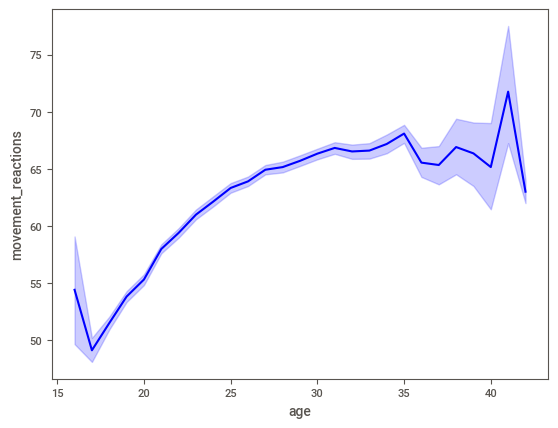

In [13]:
sns.lineplot(x='age',y='movement_reactions',data=data,color='blue')
plt.show()

* At the age 15 to 20 movement reaction is less.
* If player age is increasing player movement reaction also increasing.

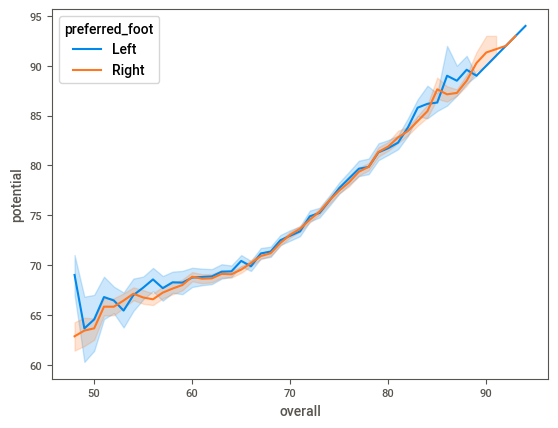

In [14]:
sns.lineplot(x='overall',y='potential',data=data,color='blue',hue='preferred_foot')
plt.show()

* If the players overall score is increasing the score of potential also increasing in both foot.

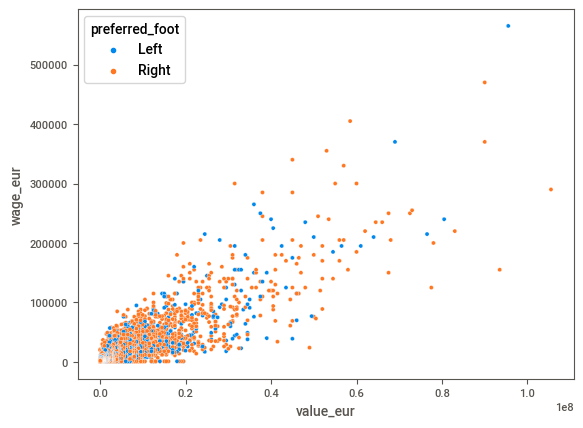

In [15]:
sns.scatterplot(x='value_eur',y='wage_eur',data=data,color='brown',hue='preferred_foot')
plt.show()

* If player value is less then the wage of player also less.
* If the value of player is more the wage is silghtly more.

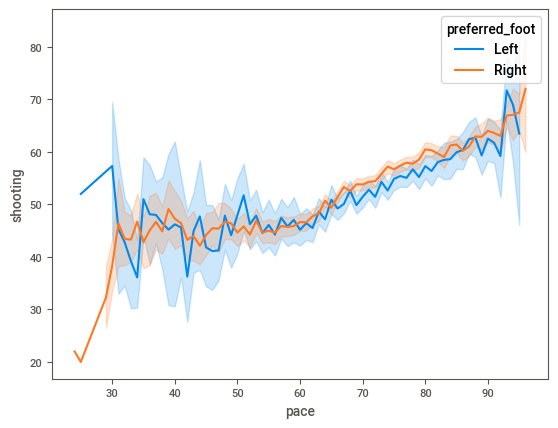

In [16]:
sns.lineplot(x='pace',y='shooting',data=data,color='brown',hue='preferred_foot')
plt.show()

* If the player preferred left foot then the pace is less but shooting is around 50 to 60.
* If the player preferred right foot then the pace is less as well as shooting also less. 

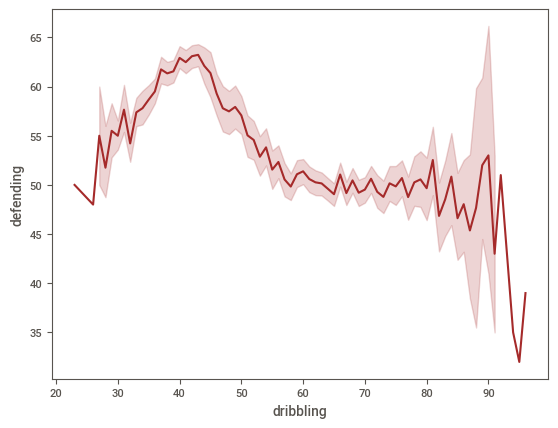

In [17]:
sns.lineplot(x='dribbling',y='defending',data=data,color='brown')
plt.show()

* If the dribbling score is 30 to 50 then the defending score is high.
* If dribbling score is more then the defending score also less.

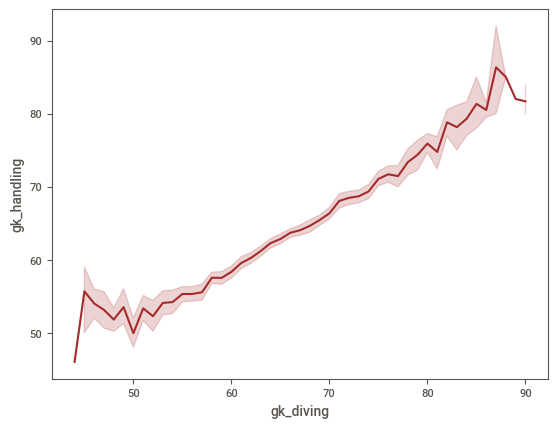

In [18]:
sns.lineplot(x='gk_diving',y='gk_handling',data=data,color='brown')
plt.show()

* If the gk diving score increases the gk handling score also increases.

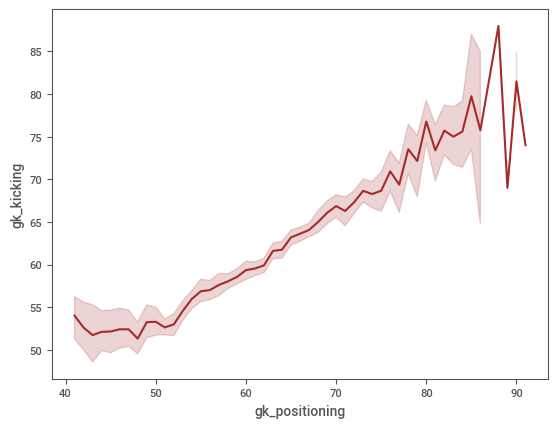

In [19]:
sns.lineplot(x='gk_positioning',y='gk_kicking',data=data,color='brown')
plt.show()

* If the gk positioning score is less then the gk kicking score also less.
* If the gk positioning score is increases then the gk kicking score also increases.

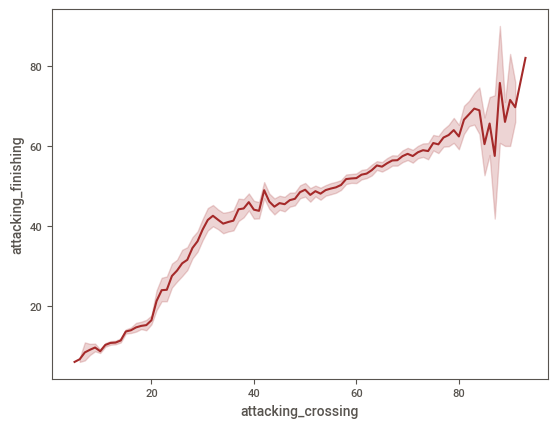

In [20]:
sns.lineplot(x='attacking_crossing',y='attacking_finishing',data=data,color='brown')
plt.show()

* Attacking score between 20 to 40 then attacking finishing score around 40 to 50.
* Either attacking crossing is more then attacking finishing also more.

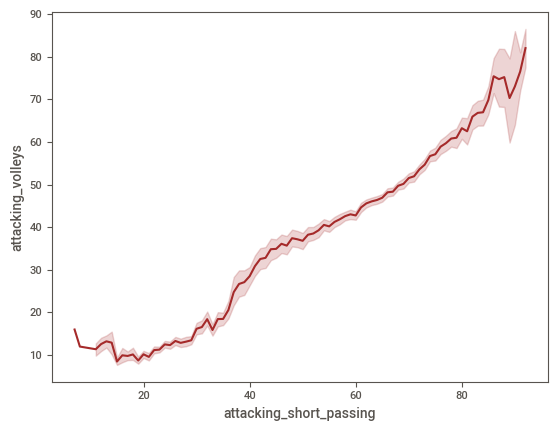

In [21]:
sns.lineplot(x='attacking_short_passing',y='attacking_volleys',data=data,color='brown')
plt.show()

* More attacking short passing then the more attacking volleys.
* Less attacking short passing then the less attacking volleys.

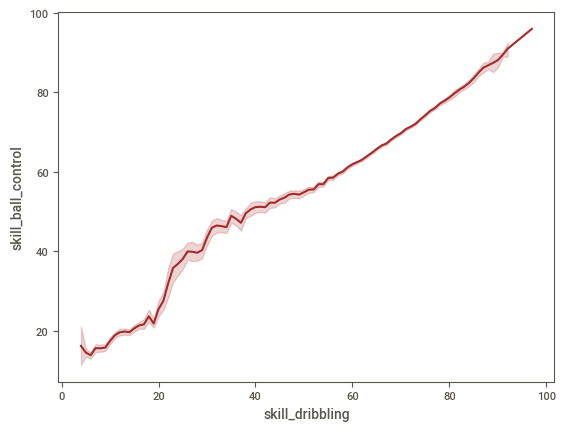

In [22]:
sns.lineplot(x='skill_dribbling',y='skill_ball_control',data=data,color='brown')
plt.show()

* If the dribbling skill is more then ball control skill also more.

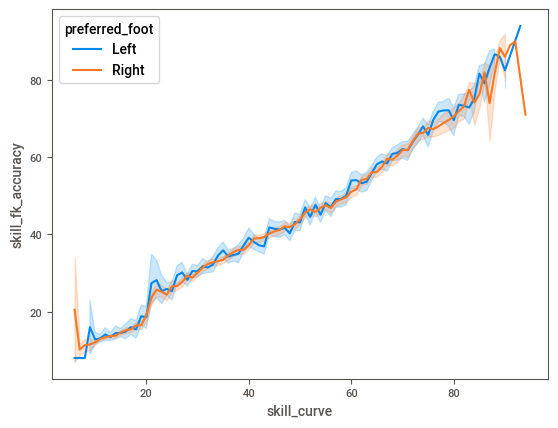

In [23]:
sns.lineplot(x='skill_curve',y='skill_fk_accuracy',data=data,color='brown',hue='preferred_foot')
plt.show()

* If skill curve is increases then the skill fk accuracy is also increases with both foot.

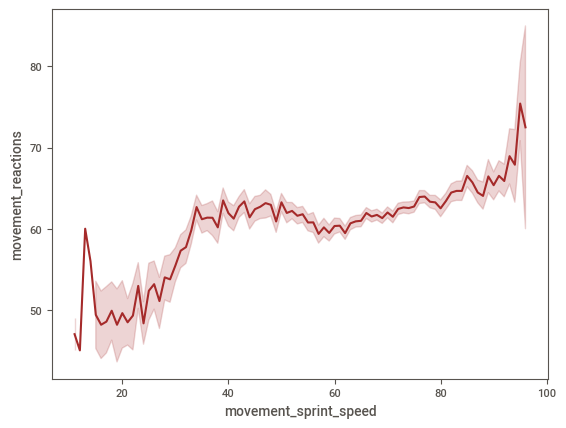

In [24]:
sns.lineplot(x='movement_sprint_speed',y='movement_reactions',data=data,color='brown')
plt.show()

* Movement sprint range around 40 to 100 then the movement reaction is constant otherwise fall in both

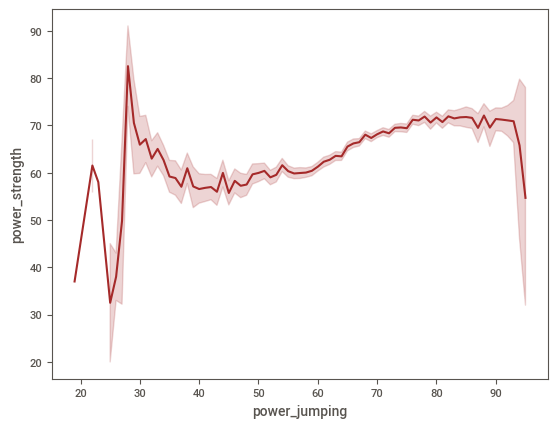

In [25]:
sns.lineplot(x='power_jumping',y='power_strength',data=data,color='brown')
plt.show()

* If the power jumping is 30 then the power strength is more.
* Power jumping above 30 then the power strength is constant.

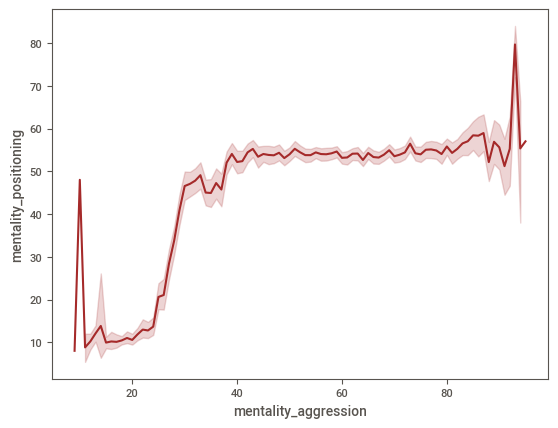

In [26]:
sns.lineplot(x='mentality_aggression',y='mentality_positioning',data=data,color='brown')
plt.show()

* If the mentality aggression around 10 to 30 then the mentality positioning is low
* Below 10 mentality aggression the score of mentality positioning is slightly high. otherwise both metality positioning score is constant.

### CATEGORICAL VARIABLE

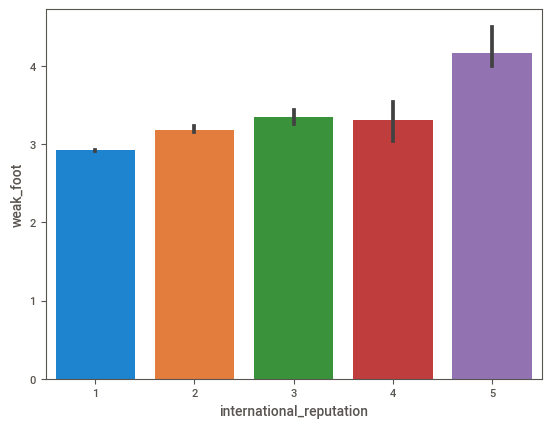

In [27]:
sns.barplot(x='international_reputation',y='weak_foot',data=data)
plt.show()

* 5 International reputation rating of player has more than 4 week foot
* 1 international reputation rating player has less than 3 weak foot
* 2, 3, 4 international reputation player has constant weak foot

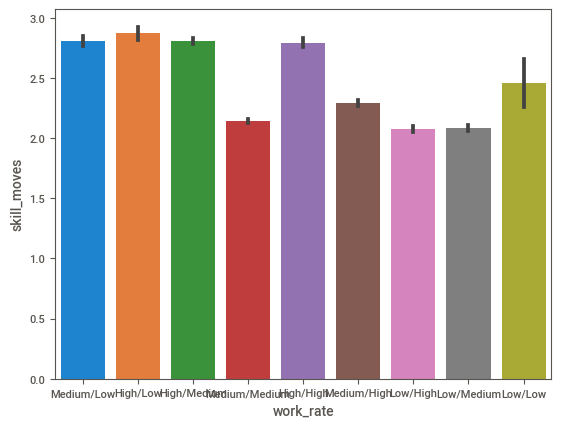

In [28]:
sns.barplot(x='work_rate',y='skill_moves',data=data)
plt.show()

* In this plot clearly seen that four types of work rate[medium/low, high/low, high/medium, high/high] has more than 2.5 skill moves
* Other work rate skill moves is less than 2.5

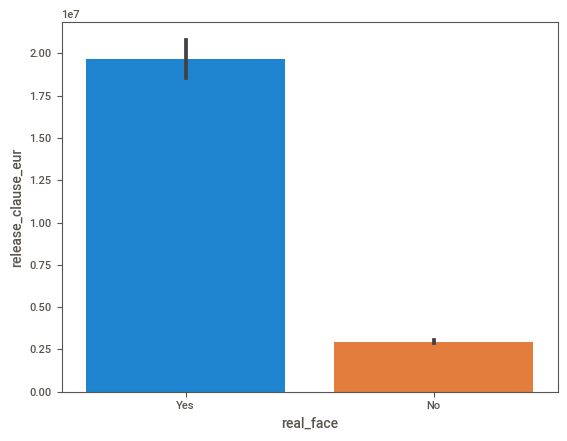

In [29]:
sns.barplot(x='real_face',y='release_clause_eur',data=data)
plt.show()

* If the player face is real then the release clause is more.
* If the player face is not real then the release clause is less

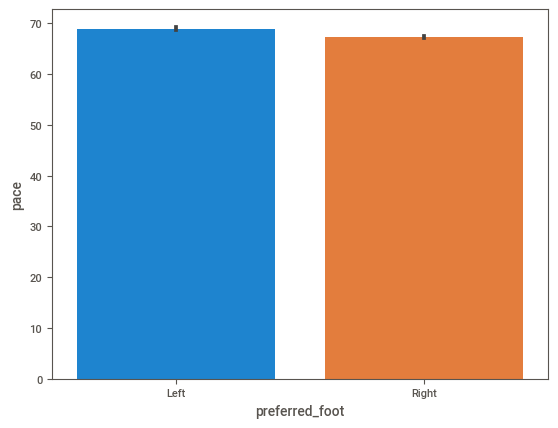

In [30]:
sns.barplot(x='preferred_foot',y='pace',data=data)
plt.show()

* Both left and right preferred foot player pace is same.

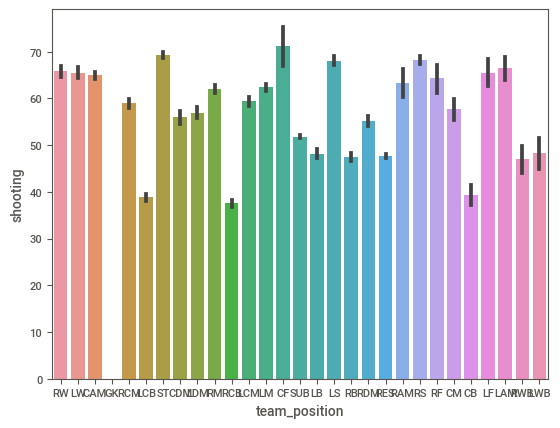

In [31]:
sns.barplot(x='team_position',y='shooting',data=data)
plt.show()

* In this plot we clearly seen that GK team position has no shooting score.
* CF team position has maximum shooting score.


### TASK

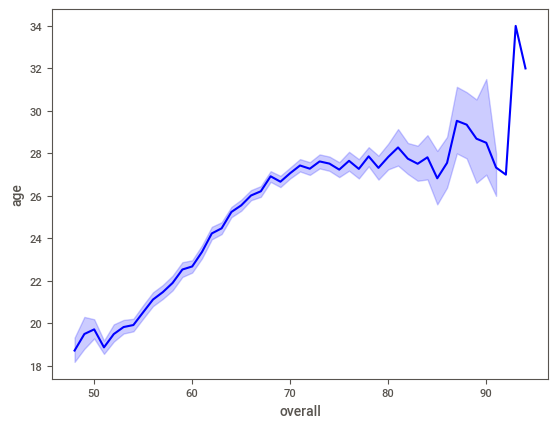

In [32]:
sns.lineplot(x='overall',y='age',data=data,color='blue')
plt.show()

- It shows that players stops improving after age of 34

In [33]:
nationality_counts = data['nationality'].value_counts()

# Get the top 10 countries
top_10_countries = nationality_counts.head(10)

print("Top 10 countries producing players in FIFA 20:")
print(top_10_countries)

Top 10 countries producing players in FIFA 20:
England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: nationality, dtype: int64


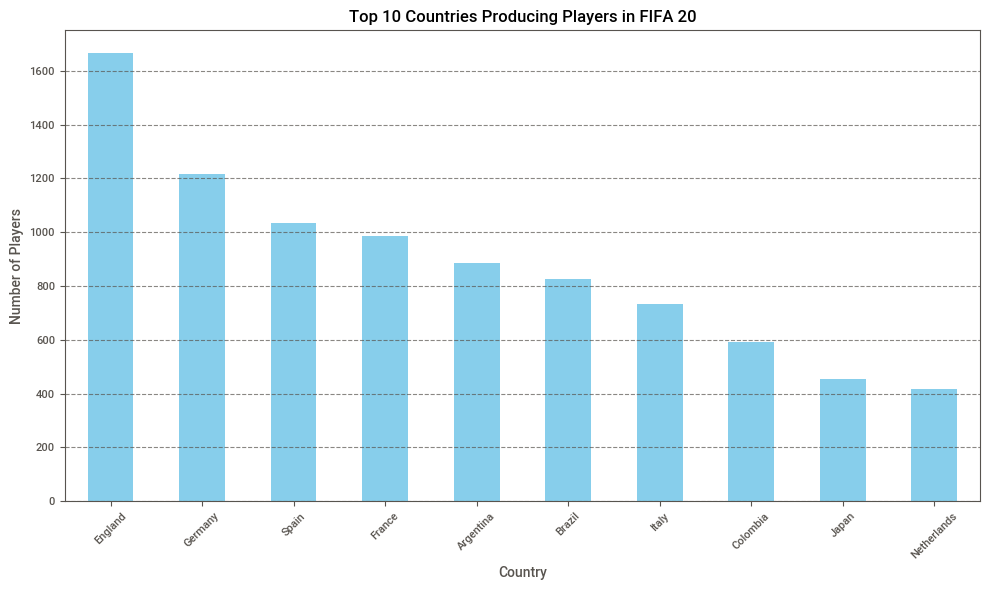

In [34]:
plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries Producing Players in FIFA 20')
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Rank ordered list of top 10 countries with most players

- England       
- Germany        
- Spain          
- France         
- Argentina       
- Brazil          
- Italy           
- Colombia        
- Japan           
- Netherlands     

In [35]:
offensive_players = data[(data['player_positions'] == 'ST') | (data['player_positions'] == 'RW') | (data['player_positions'] == 'LW')]

Highest_paid_by_position = offensive_players.groupby('player_positions')['wage_eur'].mean()

print("Highest paid by Position:")
print(Highest_paid_by_position)

Highest paid by Position:
player_positions
LW     9681.818182
RW     6208.791209
ST    10256.495301
Name: wage_eur, dtype: float64


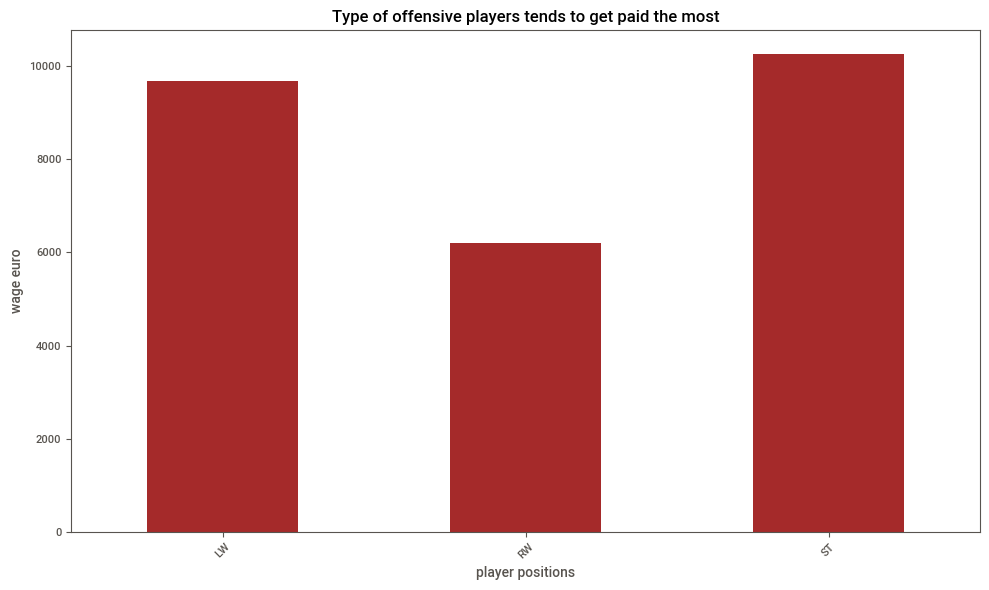

In [36]:
plt.figure(figsize=(10, 6))
Highest_paid_by_position.plot(kind='bar', color='brown')
plt.title('Type of offensive players tends to get paid the most')
plt.xlabel('player positions')
plt.ylabel('wage euro')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- The plot shows that the striker has paid the most than other.
- The left winger also paid as near to striker.

### DATA PREPROCESSING

In [37]:
# Checking null values

pd.set_option('display.max_rows',None)
data.isnull().sum()

sofifa_id                         0
player_url                        0
short_name                        0
long_name                         0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club                              0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur             1298
player_tags                   16779
team_position                   240
team_jersey_number              240
loaned_from                   17230
joined                      

In [38]:
def missing_value(data):
    null_value = data.isnull().sum()
    percentage = (data.isnull().sum()/data.isnull().count()*100)
    null_value = pd.concat([null_value,percentage],axis=1,keys=['Missing Number','Missing Percentage'])
    return null_value
missing_value(data)

,Missing Number,Missing Percentage
sofifa_id,0,0.000000
player_url,0,0.000000
short_name,0,0.000000
long_name,0,0.000000
age,0,0.000000
dob,0,0.000000
height_cm,0,0.000000
weight_kg,0,0.000000
nationality,0,0.000000
club,0,0.000000


#### IMPUTE MISSING VALUE

#### NUMERICAL

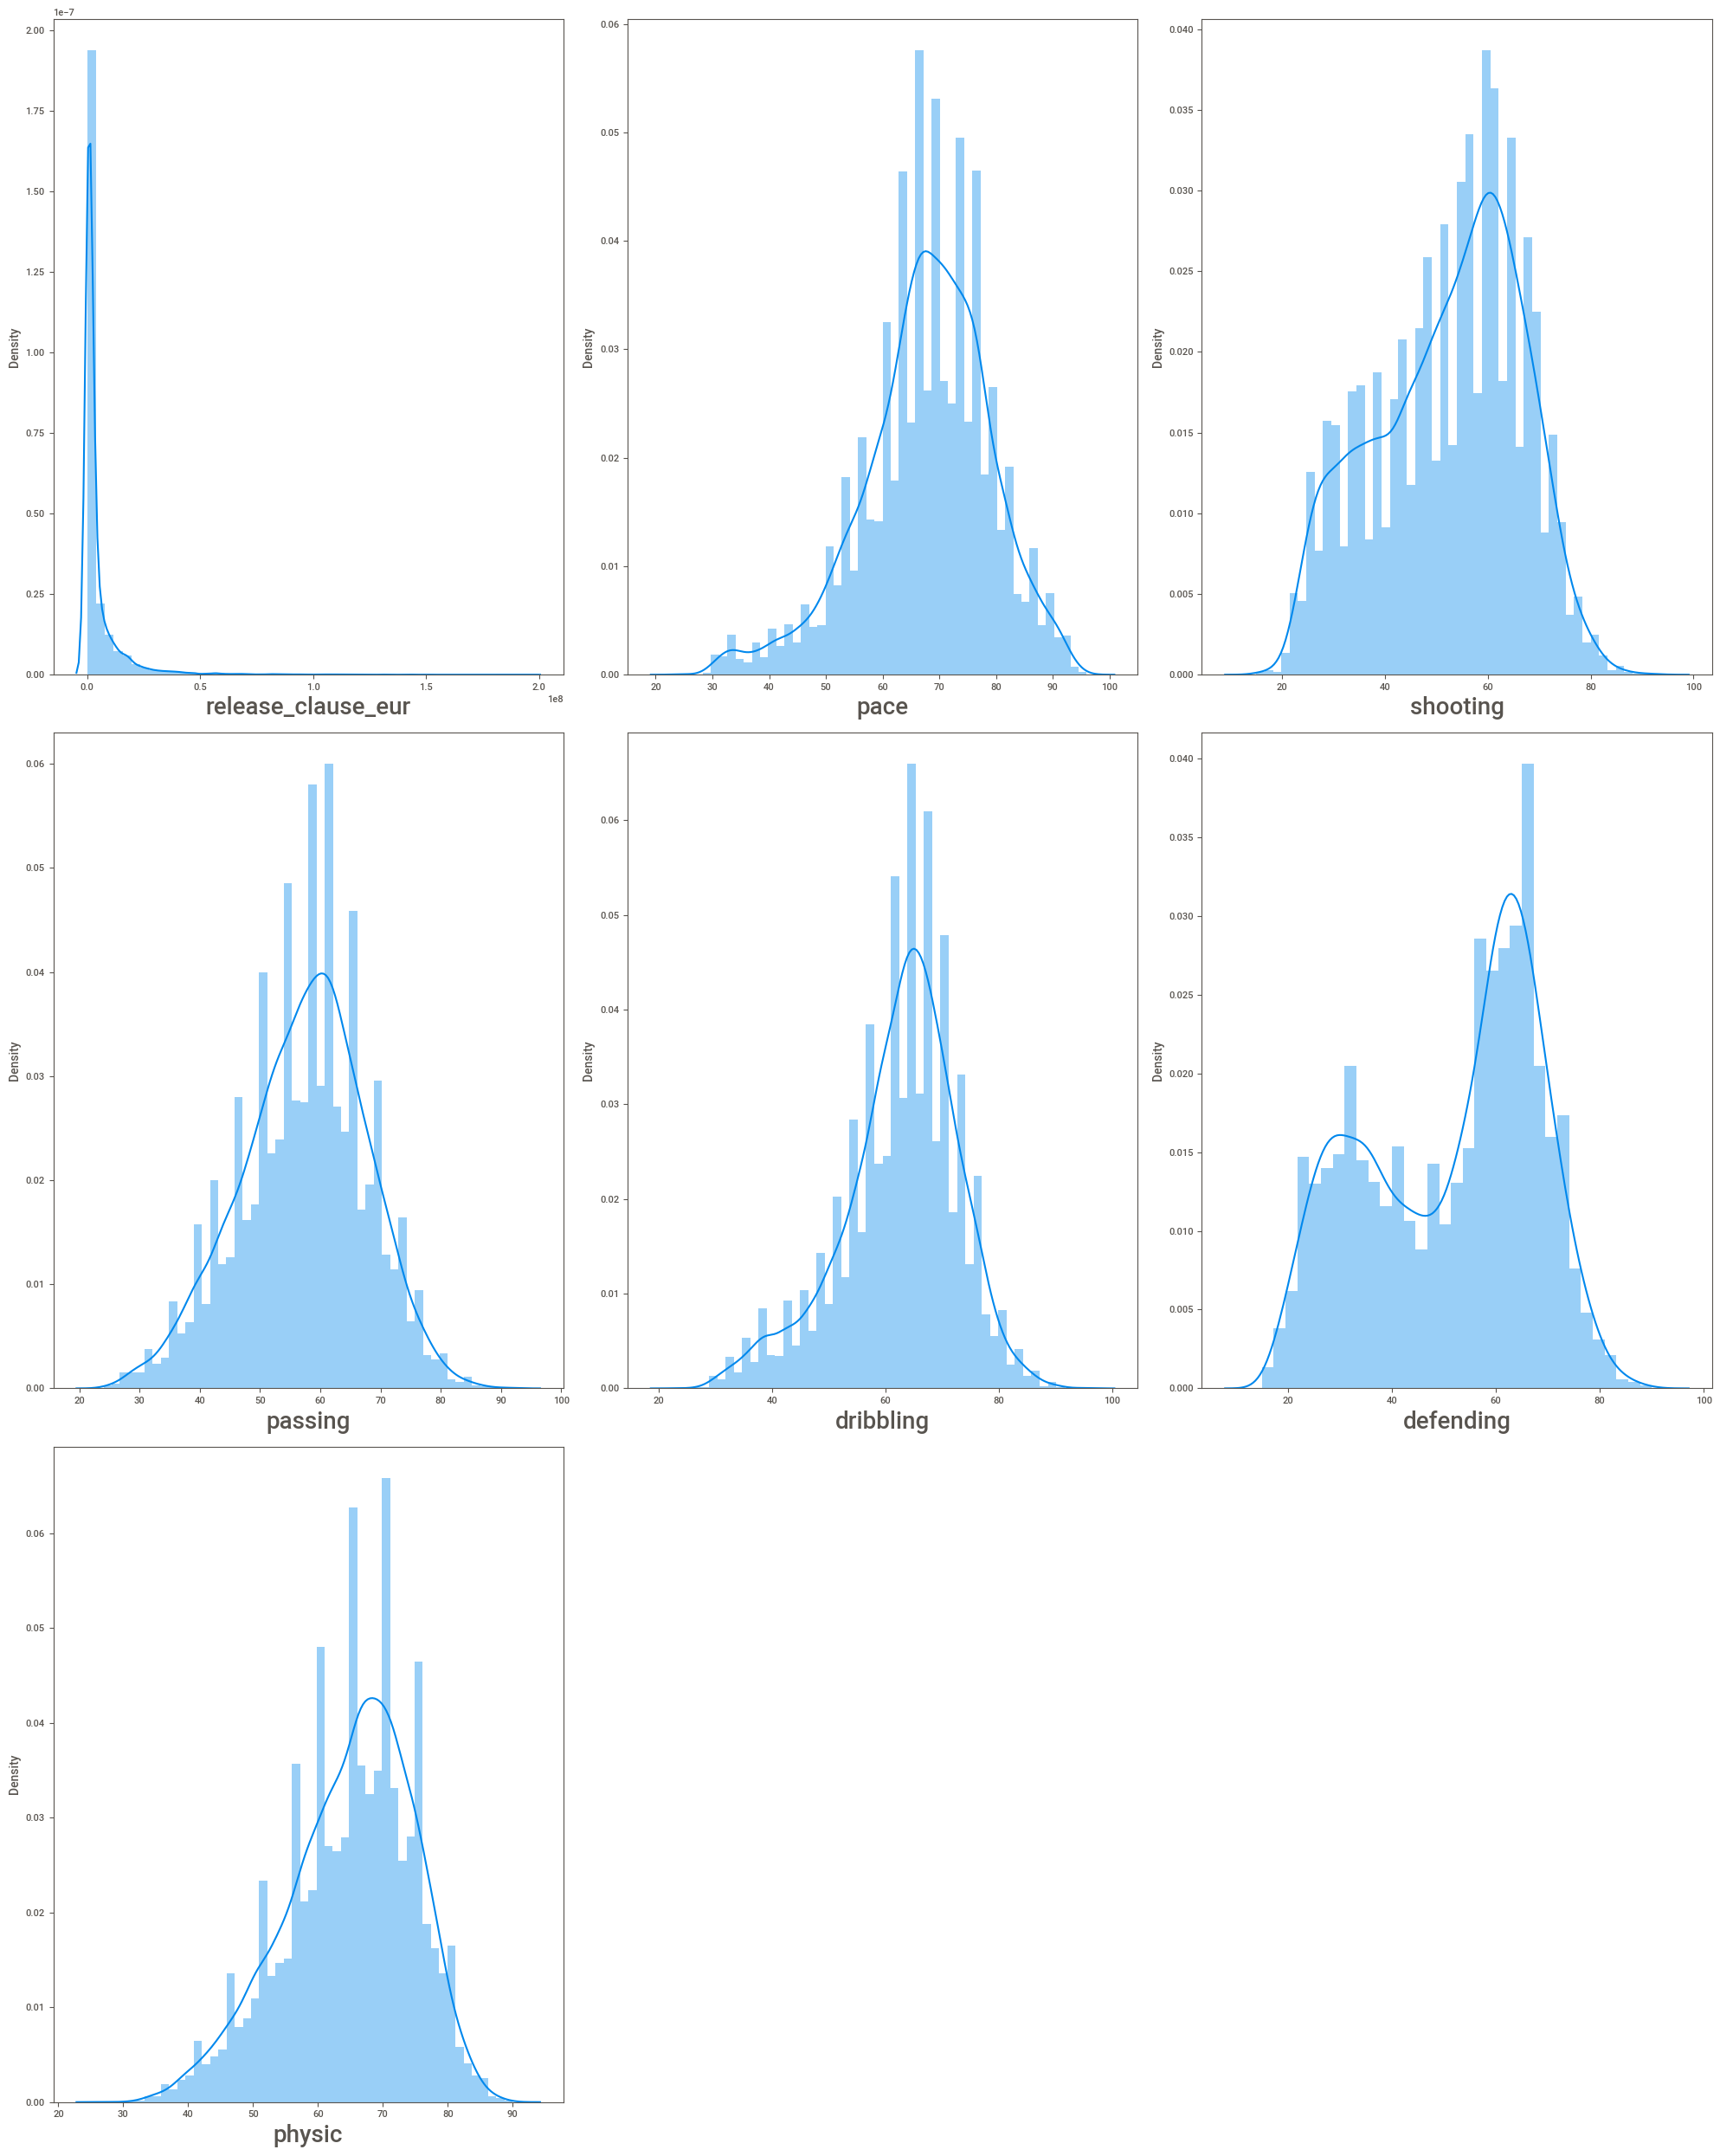

In [39]:
dist = data[['release_clause_eur','pace','shooting','passing','dribbling','defending','physic']]

plt.figure(figsize=(20,25))
plotno = 1 

for column in dist:
    if plotno<=8:  
        plt.subplot(3,3,plotno) 
        sns.distplot(x=dist[column]) 
        plt.xlabel(column,fontsize=20)
    plotno+=1
plt.tight_layout()
plt.show()

In [40]:
# Impute missing value using median because distribution is not normal
data.loc[data['release_clause_eur'].isnull()==True,'release_clause_eur']=data['release_clause_eur'].median()
data.loc[data['pace'].isnull()==True,'pace']=data['pace'].median()
data.loc[data['shooting'].isnull()==True,'shooting']=data['shooting'].median()
data.loc[data['passing'].isnull()==True,'passing']=data['passing'].median()
data.loc[data['dribbling'].isnull()==True,'dribbling']=data['dribbling'].median()
data.loc[data['defending'].isnull()==True,'defending']=data['defending'].median()
data.loc[data['physic'].isnull()==True,'physic']=data['physic'].median()


#### CATEGORICAL

In [41]:
# Get the value counts
data.team_position.value_counts().head()

SUB    7820
RES    2958
GK      662
RCB     660
LCB     660
Name: team_position, dtype: int64

In [42]:
# Impute categorical data using mode
data['team_position'] = data['team_position'].replace(np.nan,'SUB')

#### HANDLING CATEGORICAL DATA

- In this data only team position and prefered     foot is important. Remaining features are unique 

In [43]:
data.team_position = data.team_position.map({'SUB':28,'RES':27,'GK':26,'RCB':25,'LCB':24,'RB':23,'LB':22,'ST':21,
                                            'RCM':20,'LCM':19,'RM':18,'LM':17,'CAM':16,'RDM':15,'LDM':14,'RS':13,
                                            'LS':12,'CDM':11,'LW':10,'RW':9,'CB':8,'CM':7,'RWB':6,'LWB':5,'RAM':4,
                                            'LAM':3,'RF':2,'LF':1,'CF':0})

In [44]:
data.preferred_foot = data.preferred_foot.map({'Right':1,'Left':0})

### OUTLIERS

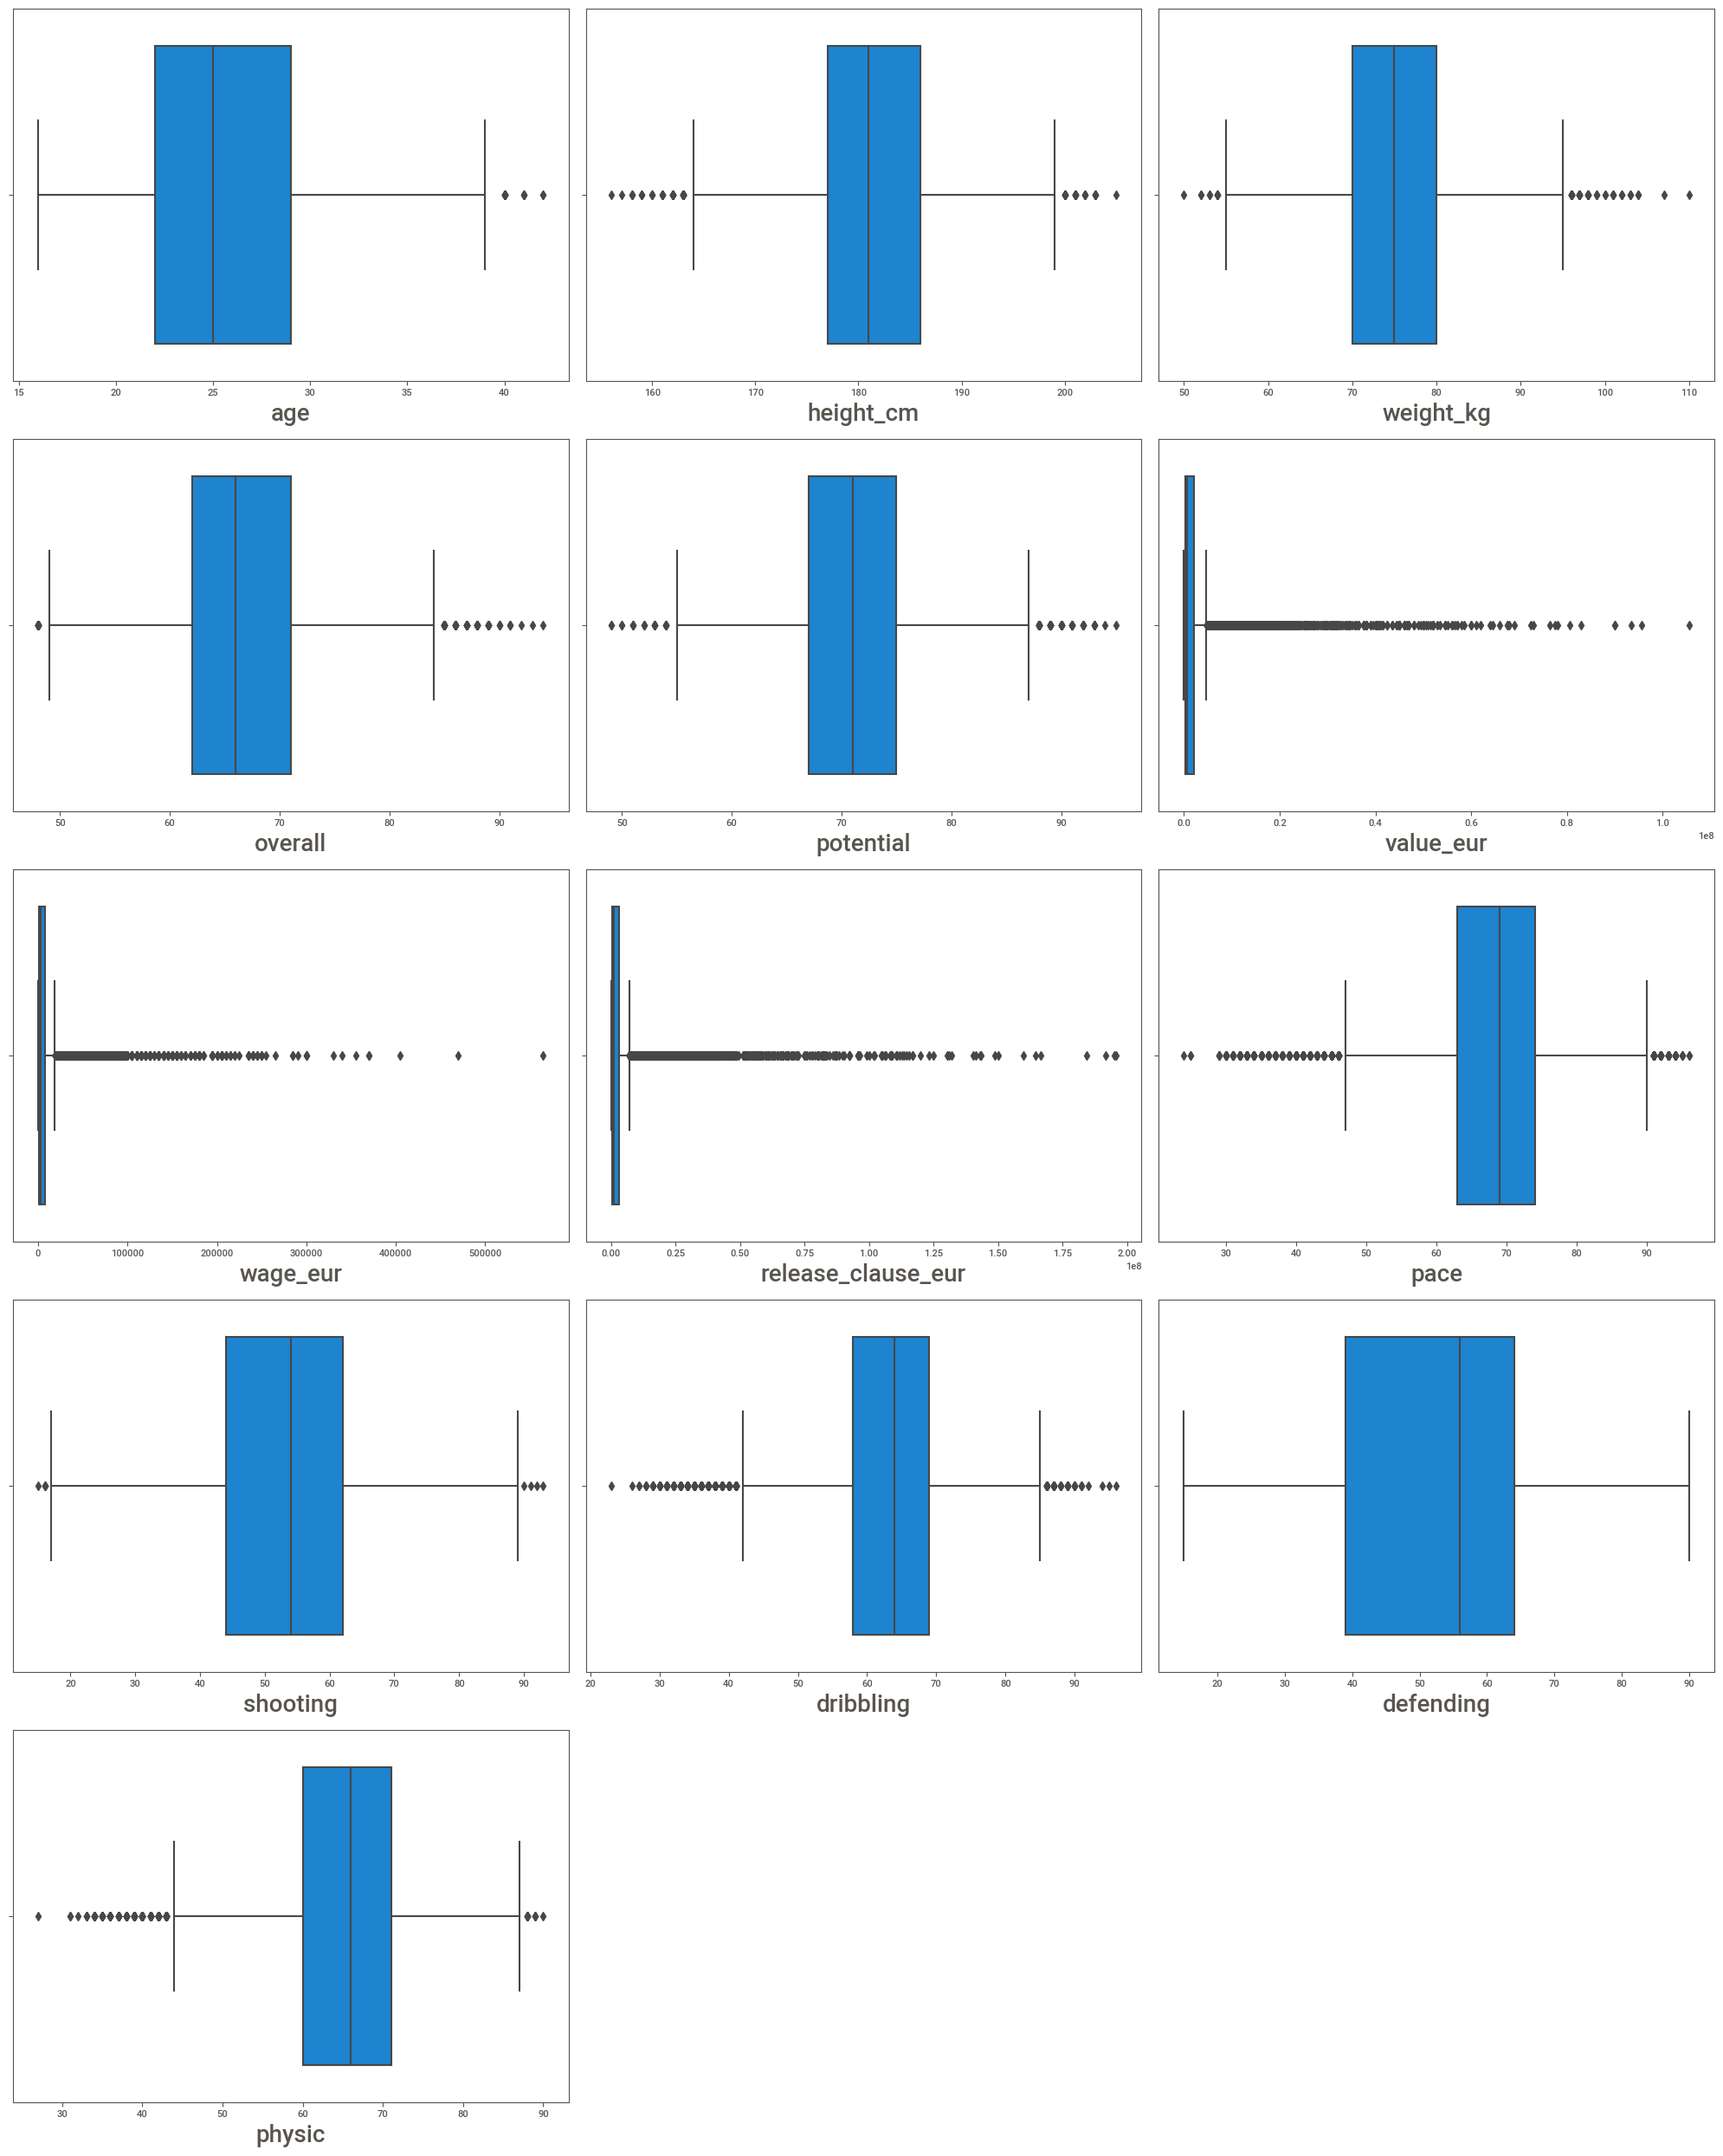

In [45]:
df = data[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','release_clause_eur','pace',
           'shooting','dribbling','defending','physic']]

plt.figure(figsize=(20,25)) 
plotno = 1 

for column in df:
    if plotno<=16:   
        plt.subplot(5,3,plotno) 
        sns.boxplot(x=df[column])  
        plt.xlabel(column,fontsize=20)  
    plotno+=1 
plt.tight_layout()
plt.show()



In [46]:
Q1 = df.quantile(0.25)  # np.percentile(data,25)

Q3 = df.quantile(0.75)

IQR = Q3-Q1

min_limit = Q1 - 1.5*IQR

max_limit = Q3 + 1.5*IQR

outliers_count = ((df > max_limit) | (df < min_limit)).sum()

outliers_percentage = (outliers_count/len(df))*100

print('\n Sum of Outliers:\n ',outliers_count)
print('\n Percentage of Outliers:\n ',outliers_percentage)


 Sum of Outliers:
  age                     19
height_cm               89
weight_kg               73
overall                151
potential              145
value_eur             2511
wage_eur              2360
release_clause_eur    2809
pace                   954
shooting                 9
dribbling              814
defending                0
physic                 433
dtype: int64

 Percentage of Outliers:
  age                    0.103950
height_cm              0.486924
weight_kg              0.399387
overall                0.826130
potential              0.793303
value_eur             13.737827
wage_eur              12.911697
release_clause_eur    15.368202
pace                   5.219389
shooting               0.049240
dribbling              4.453441
defending              0.000000
physic                 2.368968
dtype: float64


#### Age 

In [47]:
from scipy import stats

In [48]:
Q1 = df.age.quantile(0.25)
Q3 = df.age.quantile(0.75)
IQR = stats.iqr(df['age'])

max_limit = Q3+(1.5*IQR)
min_limit = Q1-(1.5*IQR) 

df.loc[(df['age'] > max_limit) | (df['age'] < min_limit),'age'] = np.mean(df['age'])

#### Height

In [49]:
Q1 = df.height_cm.quantile(0.25)
Q3 = df.height_cm.quantile(0.75)
IQR = stats.iqr(df['height_cm'])

max_limit = Q3+(1.5*IQR)
min_limit = Q1-(1.5*IQR) 

df.loc[(df['height_cm'] > max_limit) | (df['height_cm'] < min_limit),'height_cm'] = np.mean(df['height_cm'])

#### Weight

In [50]:
Q1 = df.weight_kg.quantile(0.25)
Q3 = df.weight_kg.quantile(0.75)
IQR = stats.iqr(df['weight_kg'])

max_limit = Q3+(1.5*IQR)
min_limit = Q1-(1.5*IQR) 

df.loc[(df['weight_kg'] > max_limit) | (df['weight_kg'] < min_limit),'weight_kg'] = np.mean(df['weight_kg'])

#### Overall

In [51]:
Q1 = df.overall.quantile(0.25)
Q3 = df.overall.quantile(0.75)
IQR = stats.iqr(df['overall'])

max_limit = Q3+(1.5*IQR)
min_limit = Q1-(1.5*IQR) 

df.loc[(df['overall'] > max_limit) | (df['overall'] < min_limit),'overall'] = np.mean(df['overall'])

#### Potential

In [52]:
Q1 = df.potential.quantile(0.25)
Q3 = df.potential.quantile(0.75)
IQR = stats.iqr(df['potential'])

max_limit = Q3+(1.5*IQR)
min_limit = Q1-(1.5*IQR) 

df.loc[(df['potential'] > max_limit) | (df['potential'] < min_limit),'potential'] = np.mean(df['potential'])

#### Value eur

In [53]:
Q1 = df.value_eur.quantile(0.25)
Q3 = df.value_eur.quantile(0.75)
IQR = stats.iqr(df['value_eur'])

max_limit = Q3+(1.5*IQR)
min_limit = Q1-(1.5*IQR) 

df.loc[(df['value_eur'] > max_limit) | (df['value_eur'] < min_limit),'value_eur'] = np.mean(df['value_eur'])

#### wage_eur

In [54]:
Q1 = df.wage_eur.quantile(0.25)
Q3 = df.wage_eur.quantile(0.75)
IQR = stats.iqr(df['wage_eur'])

max_limit = Q3+(1.5*IQR)
min_limit = Q1-(1.5*IQR) 

df.loc[(df['wage_eur'] > max_limit) | (df['wage_eur'] < min_limit),'wage_eur'] = np.mean(df['wage_eur'])

#### Release clause eur

In [55]:
Q1 = df.release_clause_eur.quantile(0.25)
Q3 = df.release_clause_eur.quantile(0.75)
IQR = stats.iqr(df['release_clause_eur'])

max_limit = Q3+(1.5*IQR)
min_limit = Q1-(1.5*IQR) 

df.loc[(df['release_clause_eur'] > max_limit) | (df['release_clause_eur'] < min_limit),'release_clause_eur'] = np.mean(df['release_clause_eur'])

#### pace

In [56]:
Q1 = df.pace.quantile(0.25)
Q3 = df.pace.quantile(0.75)
IQR = stats.iqr(df['pace'])

max_limit = Q3+(1.5*IQR)
min_limit = Q1-(1.5*IQR) 

df.loc[(df['pace'] > max_limit) | (df['pace'] < min_limit),'pace'] = np.mean(df['pace'])

#### shooting

In [57]:
Q1 = df.shooting.quantile(0.25)
Q3 = df.shooting.quantile(0.75)
IQR = stats.iqr(df['shooting'])

max_limit = Q3+(1.5*IQR)
min_limit = Q1-(1.5*IQR) 

df.loc[(df['shooting'] > max_limit) | (df['shooting'] < min_limit),'shooting'] = np.mean(df['shooting'])

#### Dribbling

In [58]:
Q1 = df.dribbling.quantile(0.25)
Q3 = df.dribbling.quantile(0.75)
IQR = stats.iqr(df['dribbling'])

max_limit = Q3+(1.5*IQR)
min_limit = Q1-(1.5*IQR) 

df.loc[(df['dribbling'] > max_limit) | (df['dribbling'] < min_limit),'dribbling'] = np.mean(df['dribbling'])

#### Physic 

In [59]:
Q1 = df.physic.quantile(0.25)
Q3 = df.physic.quantile(0.75)
IQR = stats.iqr(df['physic'])

max_limit = Q3+(1.5*IQR)
min_limit = Q1-(1.5*IQR) 

df.loc[(df['physic'] > max_limit) | (df['physic'] < min_limit),'physic'] = np.mean(df['physic'])

In [60]:
Q1 = df.quantile(0.25)  # np.percentile(data,25)

Q3 = df.quantile(0.75)

IQR = Q3-Q1

min_limit = Q1 - 1.5*IQR

max_limit = Q3 + 1.5*IQR

outliers_count = ((df > max_limit) | (df < min_limit)).sum()

outliers_percentage = (outliers_count/len(df))*100

print('\n Sum of Outliers:\n ',outliers_count)
print('\n Percentage of Outliers:\n ',outliers_percentage)


 Sum of Outliers:
  age                     0
height_cm               0
weight_kg               0
overall                 0
potential               0
value_eur               0
wage_eur                0
release_clause_eur      0
pace                  257
shooting                0
dribbling             987
defending               0
physic                224
dtype: int64

 Percentage of Outliers:
  age                   0.000000
height_cm             0.000000
weight_kg             0.000000
overall               0.000000
potential             0.000000
value_eur             0.000000
wage_eur              0.000000
release_clause_eur    0.000000
pace                  1.406062
shooting              0.000000
dribbling             5.399934
defending             0.000000
physic                1.225517
dtype: float64


### SCALING

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
data[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','release_clause_eur',
    'pace','shooting','passing','dribbling','defending','physic','attacking_crossing','attacking_crossing',
    'attacking_finishing','attacking_heading_accuracy','attacking_short_passing','attacking_volleys',
    'skill_dribbling','skill_curve','skill_fk_accuracy','skill_fk_accuracy','skill_long_passing',
    'skill_ball_control','skill_ball_control','movement_acceleration','movement_sprint_speed',
    'movement_agility','movement_reactions','movement_balance','power_shot_power','power_jumping',
    'power_stamina','power_strength','power_long_shots','mentality_aggression','mentality_interceptions',
    'mentality_positioning','mentality_vision','mentality_penalties','mentality_composure','defending_marking',
    'defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling',
    'goalkeeping_kicking','goalkeeping_positioning',
    'goalkeeping_reflexes']]=scaler.fit_transform(data[['age','height_cm','weight_kg','overall','potential',
                'value_eur','wage_eur','release_clause_eur','pace','shooting','passing','dribbling','defending',
                'physic','attacking_crossing','attacking_crossing','attacking_finishing','attacking_heading_accuracy',
                'attacking_short_passing','attacking_volleys','skill_dribbling','skill_curve','skill_fk_accuracy',
                'skill_fk_accuracy','skill_long_passing','skill_ball_control','skill_ball_control','movement_acceleration',
                'movement_sprint_speed','movement_agility','movement_reactions','movement_balance',
                'power_shot_power','power_jumping','power_stamina','power_strength','power_long_shots','mentality_aggression',
                'mentality_interceptions','mentality_positioning','mentality_vision','mentality_penalties',
                'mentality_composure','defending_marking','defending_standing_tackle','defending_sliding_tackle',
                'goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes']])

In [62]:
data.head(1)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,1.442333,1987-06-24,-1.681598,-0.464891,Argentina,FC Barcelona,...,68,66,66,66,68,63,52,52,52,63


### FEATURE SELECTION

In [63]:
# Drop column
data.drop(['sofifa_id','player_url','short_name','long_name','dob','nationality','club','player_positions','body_type',
          'real_face','player_tags','team_jersey_number','loaned_from','joined','contract_valid_until','nation_position',
          'nation_jersey_number','gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning',
          'player_traits','release_clause_eur','defending_standing_tackle','goalkeeping_diving','goalkeeping_handling',
          'goalkeeping_positioning','goalkeeping_reflexes','mentality_interceptions','skill_ball_control',
          'movement_sprint_speed','defending_marking','mentality_positioning','attacking_short_passing','ls','st','rs',
          'lw','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm',
          'cdm','rdm','rwb','lb','lcb','cb','rcb','rb','lf','work_rate'],axis=1,inplace=True)

<Axes: >

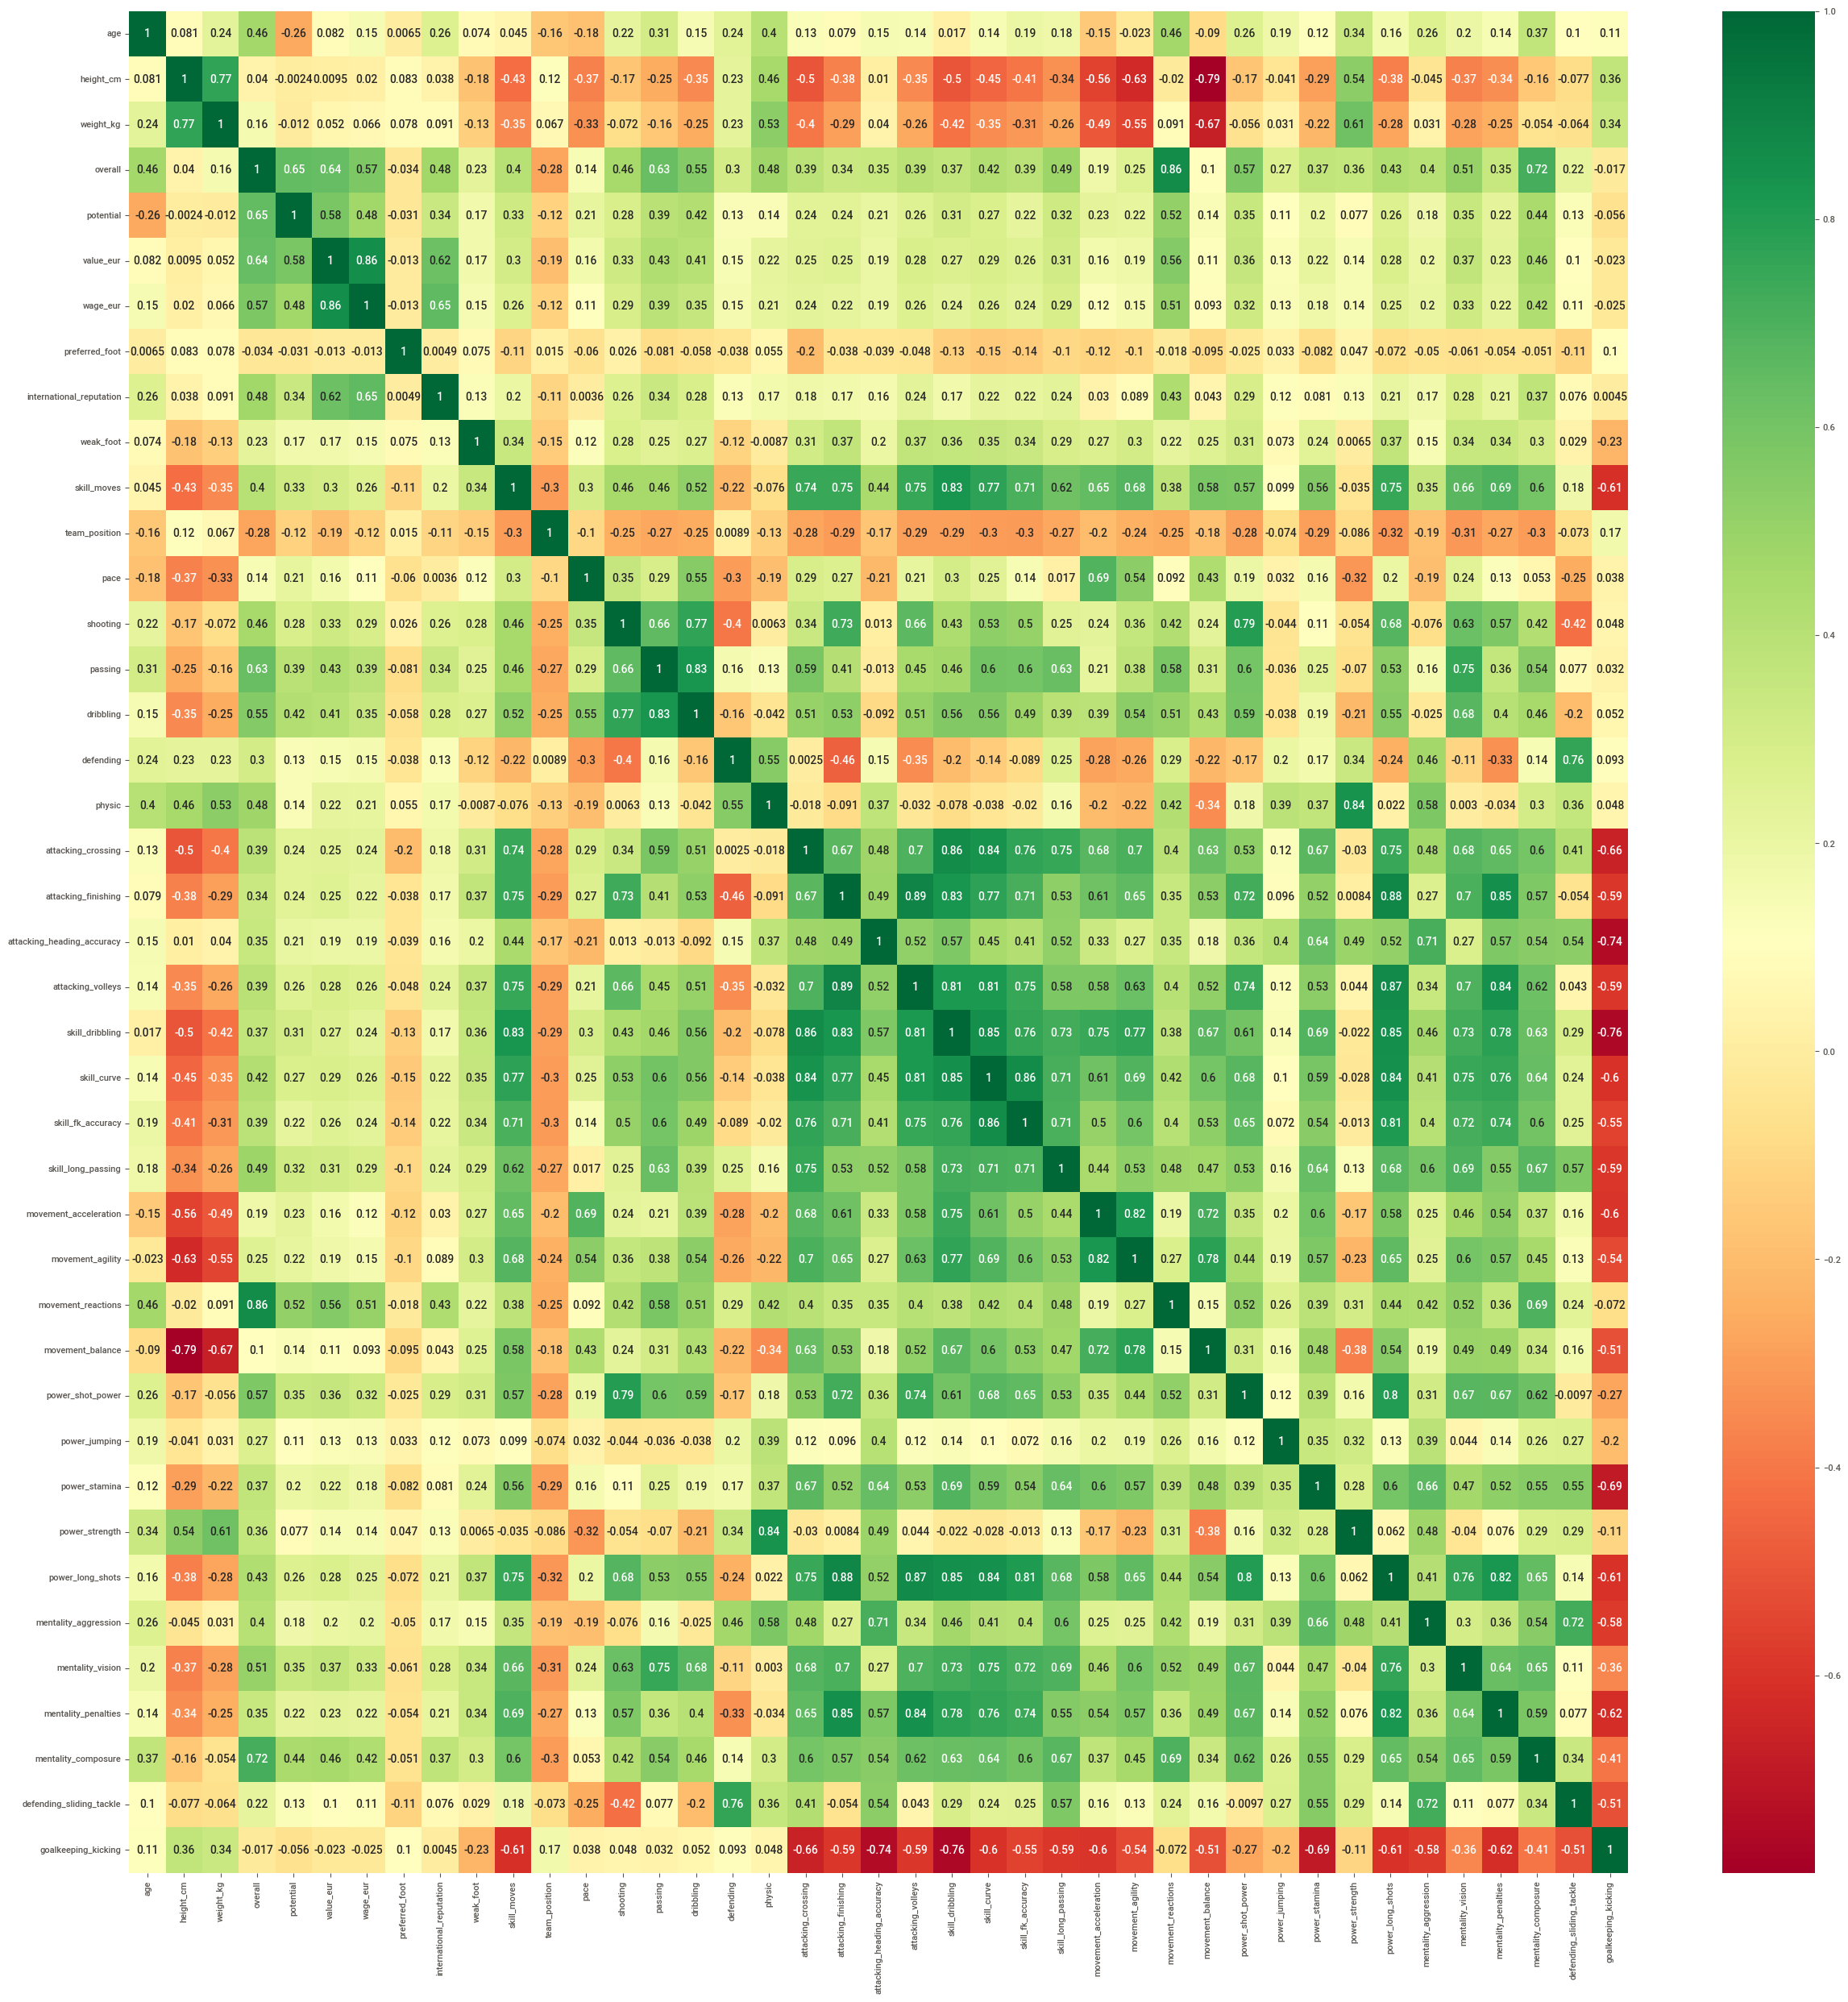

In [64]:
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")

## PRINCIPLE COMPONENT ANALYSIS (PCA)

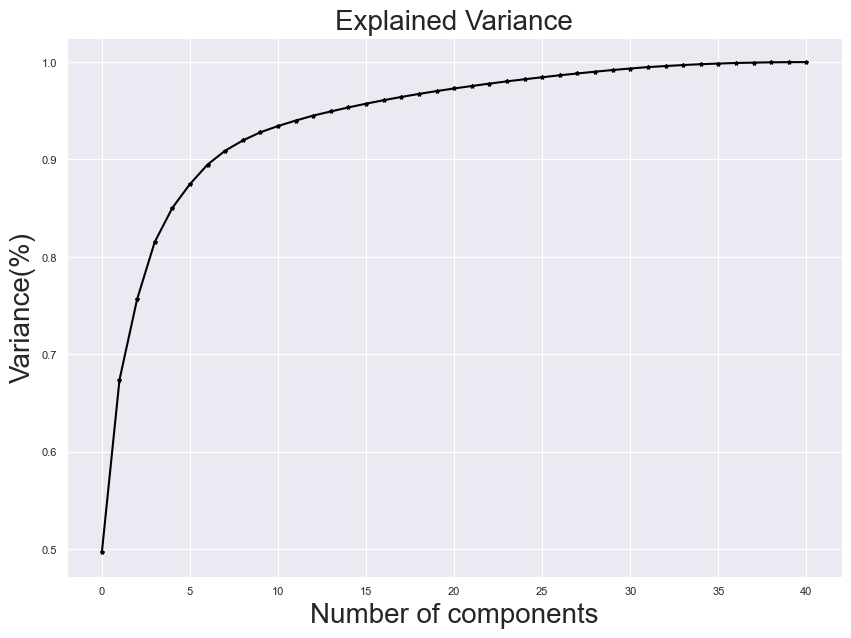

In [65]:
# Step:1 Getting optimal value of pca
from sklearn.decomposition import PCA
pca = PCA()
principlecomponents = pca.fit_transform(data) 
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='*',color='k') 
plt.xlabel('Number of components',fontsize=20)
plt.ylabel('Variance(%)',fontsize=20) 
plt.title('Explained Variance',fontsize=20)
plt.show()

In [66]:
# Step:2 Select the components
pca = PCA(n_components=10)
fifa = pca.fit_transform(data)

# Step:3 Make new dataframe
principle_df = pd.DataFrame(data=fifa,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10'])
principle_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10
0,20.411612,-9.147598,5.623155,13.454886,8.696506,10.667187,8.470246,13.609426,12.025451,6.349549
1,18.576436,-7.042335,6.485370,10.138163,3.736997,9.056443,3.810232,8.808964,7.355709,3.955310
2,13.194411,-10.102263,2.899553,10.975894,6.886125,8.693288,6.813159,9.077478,8.045046,3.192436
3,-2.042487,1.698715,5.739094,10.105411,6.276326,6.494681,2.710111,5.478343,2.304810,1.126603
4,18.720716,-7.758282,4.199988,11.567542,7.558634,10.175353,7.554340,10.971768,10.997277,4.882690


### MODEL IMPLEMENTATION

### K-MEANS CLUSTERING

In [67]:
X = principle_df
X.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10
0,20.411612,-9.147598,5.623155,13.454886,8.696506,10.667187,8.470246,13.609426,12.025451,6.349549
1,18.576436,-7.042335,6.485370,10.138163,3.736997,9.056443,3.810232,8.808964,7.355709,3.955310
2,13.194411,-10.102263,2.899553,10.975894,6.886125,8.693288,6.813159,9.077478,8.045046,3.192436
3,-2.042487,1.698715,5.739094,10.105411,6.276326,6.494681,2.710111,5.478343,2.304810,1.126603
4,18.720716,-7.758282,4.199988,11.567542,7.558634,10.175353,7.554340,10.971768,10.997277,4.882690


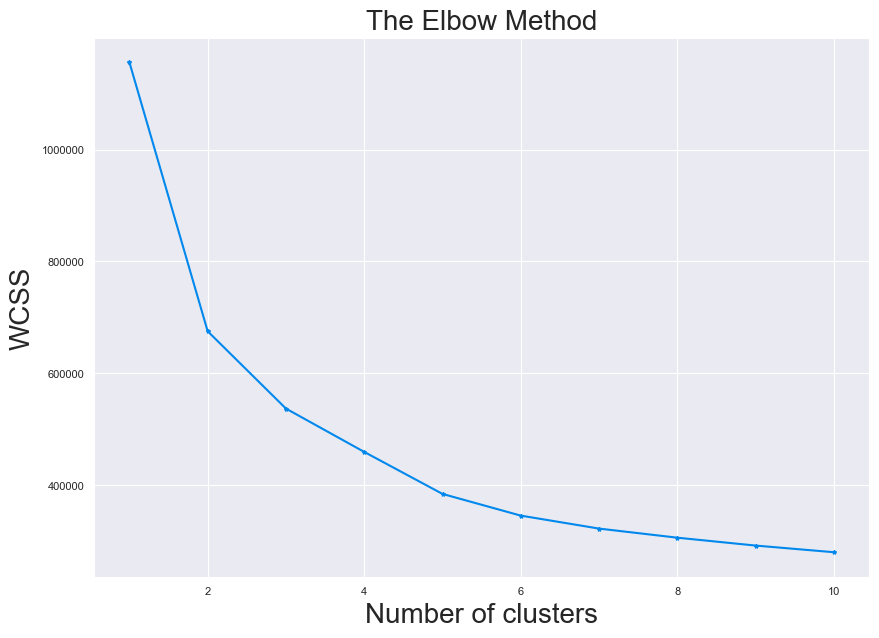

In [68]:
from sklearn.cluster import KMeans
kmeans = KMeans()
wcss = [] 

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans = kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,7))
plt.plot(range(1,11),wcss,marker='*')
plt.title('The Elbow Method',fontsize=20)
plt.xlabel('Number of clusters',fontsize=20)
plt.ylabel('WCSS',fontsize=20)
plt.show()


In [69]:
# Initalize the cluster
kmeans = KMeans(n_clusters=2,random_state=45)

kmeans.fit(X)

kmeans.labels_

principle_df['cluster'] = pd.DataFrame(kmeans.labels_)
principle_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,cluster
0,20.411612,-9.147598,5.623155,13.454886,8.696506,10.667187,8.470246,13.609426,12.025451,6.349549,1
1,18.576436,-7.042335,6.485370,10.138163,3.736997,9.056443,3.810232,8.808964,7.355709,3.955310,1
2,13.194411,-10.102263,2.899553,10.975894,6.886125,8.693288,6.813159,9.077478,8.045046,3.192436,1
3,-2.042487,1.698715,5.739094,10.105411,6.276326,6.494681,2.710111,5.478343,2.304810,1.126603,0
4,18.720716,-7.758282,4.199988,11.567542,7.558634,10.175353,7.554340,10.971768,10.997277,4.882690,1


In [70]:
# Step:7 initalize the centroids
kmeans.cluster_centers_

array([[-2.80297360e+00, -1.41094340e-01,  7.76376726e-02,
        -7.06947242e-02,  4.70284747e-02,  1.14255215e-02,
        -2.25607650e-03,  3.92427287e-03,  7.29619314e-03,
        -1.66538554e-02],
       [ 9.34324533e+00,  4.70314467e-01, -2.58792242e-01,
         2.35649081e-01, -1.56761582e-01, -3.80850715e-02,
         7.52025499e-03, -1.30809096e-02, -2.43206438e-02,
         5.55128513e-02]])

In [71]:
# Create a new veriable assign to labels
labels = kmeans.labels_
labels

# Import library to evaluate the model
from sklearn.metrics import silhouette_score
silhouette_score = silhouette_score(X,labels)
print("Silhouette Score:",silhouette_score)

Silhouette Score: 0.4316522487522079


### Conclusion

- A complete data analysis report on the given data has been done.
- With the help of the k-means clustering algorithm on the FIFA 20 dataset, we have gained valuable     insights into player performance and characteristics within the game. Through clustering analysis,     we have identified distinct player groups based on various attributes such as skill, position, and     overall effectiveness.
- Using 2 clusters we get a silhouette score of 0.43188064169374907